# **Regresión Lineal con 1 Variable**

## **Imports:**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt #importar biblioteca y renombrarla a plt
import numpy as np

## Lector de CSV 

In [2]:
def readCsv(nombre):
    valores = pd.read_csv(nombre, header = None).values
    return valores.astype(float)

## Regresion Lineal

In [3]:
def LinearRegression(valores):
    #Formar la matriz X y el vector Y
    X = np.transpose(np.array(valores[:-1]))
    x = np.transpose(np.array(X[:-1]))
    y = np.transpose(np.array(X[-1:]))
    m = y.size # numero de casos de entrenamiento
    #Insertar la columna de 1s en la matriz X
    x = np.insert(x,0,1,axis=1)
    return x,y,m

## Grafica

In [4]:
def PlotData(X,y):
    
    
    plt.figure(figsize=(10,6))
    plt.plot(X[:,1],y[:,0],'rx',markersize=10)
    plt.ylabel('Ingresos en $10,000s')
    plt.xlabel('Población de la ciudad en 10,000s')

# Dibujado de gráfica con datos de entrenamiento

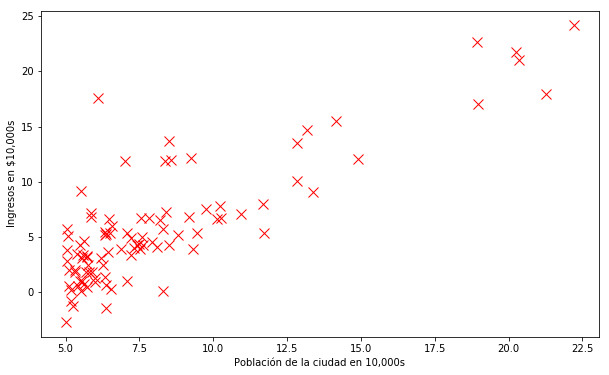

In [5]:
datos = readCsv("ex1data1.csv")
X,y,m=LinearRegression(datos)
PlotData(X,y)
iterations = 1500
alpha = 0.01

## Coste de la funcion


In [6]:
def h(theta,X): 
    return np.dot(X,theta)

def computeCost(mytheta,X,y): 
    return float((1./(2*m)) * np.dot((h(mytheta,X)-y).T,(h(mytheta,X)-y)))

initial_theta = np.zeros((X.shape[1],1)) #(theta es un vector con n filas y 1 columna)

## Descenso de Gradiente

In [7]:
def descendGradient(X, theta_start = np.zeros(2)):
    theta = theta_start
    jvec = [] 
    thetahistory = []
    for meaninglessvariable in range(iterations):
        tmptheta = theta
        jvec.append(computeCost(theta,X,y))
        thetahistory.append(list(theta[:,0]))
        for j in range(len(tmptheta)):
            tmptheta[j] = theta[j] - (alpha/m)*np.sum((h(initial_theta,X) - y)*np.array(X[:,j]).reshape(m,1))
        theta = tmptheta
    return theta, thetahistory, jvec

## Grafica de Coste

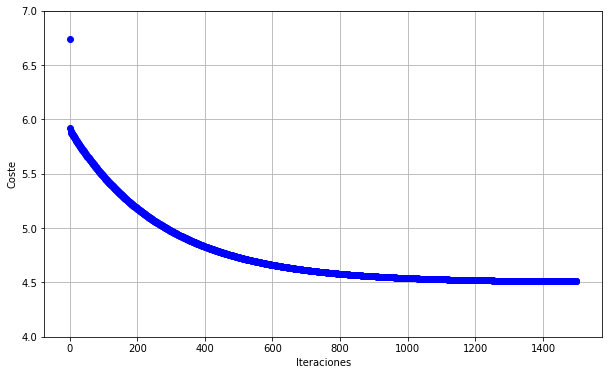

In [8]:

initial_theta = np.zeros((X.shape[1],1))
theta, thetahistory, jvec = descendGradient(X,initial_theta)

#Plot the convergence of the cost function
def plotConvergence(jvec):
    plt.figure(figsize=(10,6))
    plt.plot(range(len(jvec)),jvec,'bo')
    plt.grid(True)
    plt.xlabel("Iteraciones")
    plt.ylabel("Coste")
    a = plt.xlim([-0.05*iterations,1.05*iterations])
    


plotConvergence(jvec)
a = plt.ylim([4,7])

## Grafica encima de los datos de aprendizaje

Text(0.5,0,'Población de la ciudad en 10,000s')

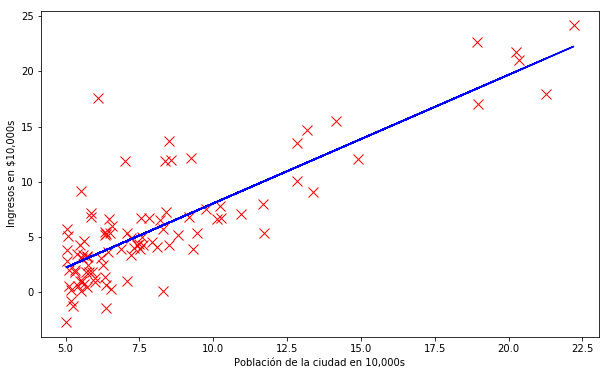

In [9]:

def myfit(xval):
    return theta[0] + theta[1]*xval
plt.figure(figsize=(10,6))
plt.plot(X[:,1],y[:,0],'rx',markersize=10)
plt.plot(X[:,1],myfit(X[:,1]),'b-')
plt.ylabel('Ingresos en $10,000s')
plt.xlabel('Población de la ciudad en 10,000s')


## Visualizar J($\theta$)

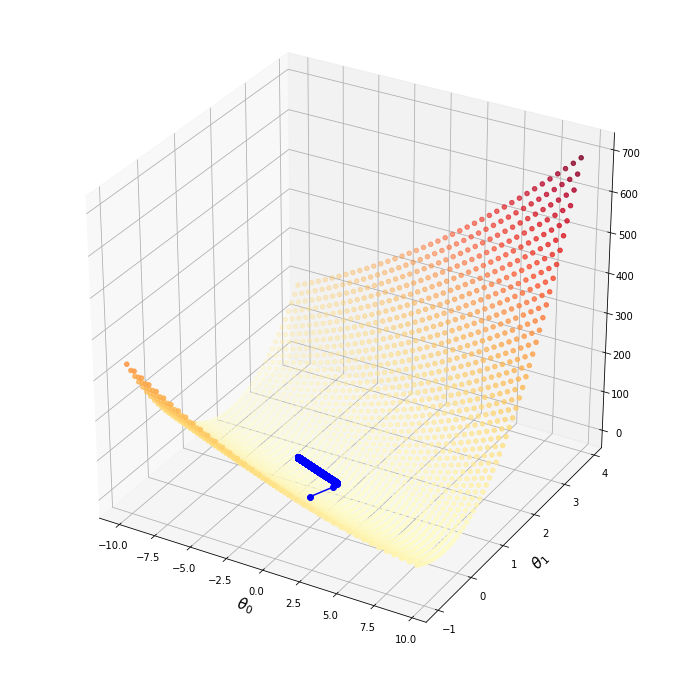

In [10]:
from mpl_toolkits.mplot3d import axes3d, Axes3D
from matplotlib import cm
import itertools

fig = plt.figure(figsize=(12,12))
ax = fig.gca(projection='3d')

xvals = np.arange(-10,10,.5)
yvals = np.arange(-1,4,.1)
myxs, myys, myzs = [], [], []
for x1 in xvals:
    for y1 in yvals:
        myxs.append(x1)
        myys.append(y1)
        myzs.append(computeCost(np.array([[x1], [y1]]),X,y))

scat = ax.scatter(myxs,myys,myzs,c=np.abs(myzs),cmap=plt.get_cmap('YlOrRd'))

plt.xlabel(r'$\theta_0$',fontsize=15)
plt.ylabel(r'$\theta_1$',fontsize=15)
plt.plot([x[0] for x in thetahistory],[x[1] for x in thetahistory],jvec,'bo-')
plt.show()

# Regresión Lineal con Varias Variables


## Lectura de datos

In [11]:
datos2 = readCsv("ex1data2.csv")
X,y,m=LinearRegression(datos2)

## Normalizar

In [12]:
stored_feature_means, stored_feature_stds = [], []
Xnorm = X.copy()
for icol in range(Xnorm.shape[1]):
    stored_feature_means.append(np.mean(Xnorm[:,icol]))
    stored_feature_stds.append(np.std(Xnorm[:,icol]))
    if not icol: continue
    Xnorm[:,icol] = (Xnorm[:,icol] - stored_feature_means[-1])/stored_feature_stds[-1]

## Descenso de gradiente

In [13]:
initial_theta = np.zeros((Xnorm.shape[1],1))
theta, thetahistory, jvec = descendGradient(Xnorm,initial_theta)

## Probamos el valor (1650,3) para ver que precio deduce

In [14]:

print ("Precio deducido para una casa de 1650 metros cuadrados y 3 habitaciones")
ytest = np.array([1650.,3.])
ytestscaled = [(ytest[x]-stored_feature_means[x+1])/stored_feature_stds[x+1] for x in range(len(ytest))]
ytestscaled.insert(0,1)
print ("$%0.2f" % float(h(theta,ytestscaled)))

Precio deducido para una casa de 1650 metros cuadrados y 3 habitaciones
$292817.57


### Ecuación normal/directa

In [15]:
from numpy.linalg import inv
def normEqtn(X,y):
    return np.dot(np.dot(inv(np.dot(X.T,X)),X.T),y)

In [16]:
print ("Predicción para una casa de 1650 metros cuadrados y 3 habitaciones")
print ("$%0.2f" % float(h(normEqtn(X,y),[1,1650.,3])))

Predicción para una casa de 1650 metros cuadrados y 3 habitaciones
$292798.87
